In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import re, os
import numpy as np
import xarray as xr
import tensorflow.keras as keras
import datetime
import pdb
import matplotlib.pyplot as plt
from src.utils import *
from src.score import *
from src.data_generator import *
from src.networks import *
from src.train import *
from src.clr import LRFinder

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]=str(3)
limit_mem()

In [4]:
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_policy(policy)

In [5]:
def test_lr(exp_id):
    args = load_args(f'../nn_configs/B/{exp_id}.yml')
    args['train_years'] = ['2014', '2015']
    dg_train, dg_valid, dg_test = load_data(**args)
    if args['network_type'] == 'resnet':
        model = build_resnet(
            **args, input_shape=dg_train.shape,
        )
    elif args['network_type'] == 'uresnet':
        model = build_uresnet(
            **args, input_shape=dg_train.shape,
        )
    if args['loss'] == 'lat_mse':
        loss = create_lat_mse(dg_train.data.lat)
    if args['loss'] == 'lat_rmse':
        loss = create_lat_rmse(dg_train.data.lat)
    if args['optimizer'] == 'adam':
        opt = keras.optimizers.Adam(args['lr'])
    elif args['optimizer'] =='adadelta':
        opt = keras.optimizers.Adadelta(args['lr'])
    model.compile(opt, loss, metrics=['mse'])
    lrf = LRFinder(
        dg_train.n_samples, args['batch_size'],
        minimum_lr=1e-6, maximum_lr=1e-3,
        lr_scale='exp', save_dir='./', verbose=0)
    model.fit(dg_train, epochs=1, callbacks=[lrf])
    return lrf

In [7]:
args = load_args(f'../nn_configs/B/103-resnet_d3_clr_sgd.yml')

In [8]:
args['train_years'] = ['2014', '2015']

In [9]:
args['lr']

5e-05

In [10]:
dg_train, dg_valid, dg_test = load_data(**args)

In [19]:
if args['network_type'] == 'resnet':
    model = build_resnet(
        **args, input_shape=dg_train.shape,
    )
elif args['network_type'] == 'uresnet':
    model = build_uresnet(
        **args, input_shape=dg_train.shape,
    )

In [20]:
args['optimizer'] = 'rmsprop'
args['momentum'] = 0.0

In [21]:
if args['loss'] == 'lat_mse':
    loss = create_lat_mse(dg_train.data.lat)
if args['loss'] == 'lat_rmse':
    loss = create_lat_rmse(dg_train.data.lat)
if args['optimizer'] == 'adam':
    opt = keras.optimizers.Adam(args['lr'])
elif args['optimizer'] =='adadelta':
    opt = keras.optimizers.Adadelta(args['lr'])
elif args['optimizer'] =='sgd':
    opt = keras.optimizers.SGD(args['lr'], momentum=args['momentum'])
elif args['optimizer'] =='rmsprop':
    opt = keras.optimizers.SGD(args['lr'], momentum=args['momentum'])
model.compile(opt, loss, metrics=['mse'])

In [22]:
lrf = LRFinder(
    dg_train.n_samples, args['batch_size'],
    minimum_lr=1e-6, maximum_lr=1e-3,
    lr_scale='exp', save_dir='./', verbose=0)

In [23]:
model.fit(dg_train, epochs=1, callbacks=[lrf])

  ...
    to  
  ['...']
Train for 273 steps
273/273 [==============================] - 60s 219ms/step - loss: 40.2996 - mse: 41.0223


In [24]:
import matplotlib.ticker as ticker
def plot_lr_find(lrf, xlim=None, ylim=None, log=False):
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.plot(10**lrf.lrs, lrf.losses)
    plt.xlabel('lr'); plt.ylabel('loss')
    if log: plt.yscale('log')
    if ylim is not None: plt.ylim(ylim)
    if xlim is not None: plt.xlim(xlim)
    x_labels = ax.get_xticks()
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))

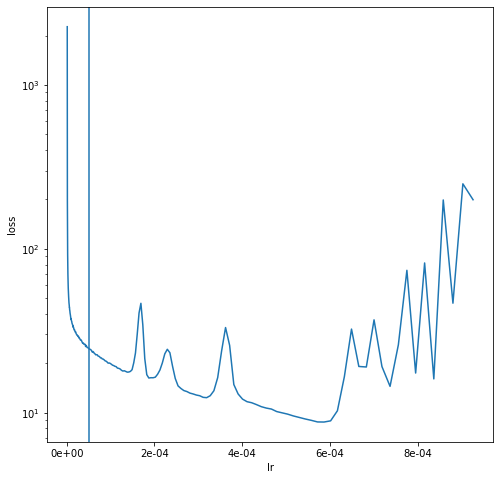

In [25]:
plot_lr_find(lrf, log=True)
plt.axvline(args['lr'])

### RMSE loss

In [194]:
args = load_args(f'../nn_configs/B/71-resnet_d3_best_5d.yml')

In [195]:
args['loss'] = 'lat_rmse'

In [196]:
if args['network_type'] == 'resnet':
    model = build_resnet(
        **args, input_shape=dg_train.shape,
    )
elif args['network_type'] == 'uresnet':
    model = build_uresnet(
        **args, input_shape=dg_train.shape,
    )

In [197]:
if args['loss'] == 'lat_mse':
    loss = create_lat_mse(dg_train.data.lat)
if args['loss'] == 'lat_rmse':
    loss = create_lat_rmse(dg_train.data.lat)
if args['optimizer'] == 'adam':
    opt = keras.optimizers.Adam(args['lr'])
elif args['optimizer'] =='adadelta':
    opt = keras.optimizers.Adadelta(args['lr'])
model.compile(opt, loss, metrics=['mse'])

In [198]:
lrf = LRFinder(
    dg_train.n_samples, args['batch_size'],
    minimum_lr=1e-4, maximum_lr=1e-1,
    lr_scale='exp', save_dir='./', verbose=0)

In [213]:
if args['network_type'] == 'resnet':
    model = build_resnet(
        **args, input_shape=dg_train.shape,
    )
elif args['network_type'] == 'uresnet':
    model = build_uresnet(
        **args, input_shape=dg_train.shape,
    )

In [214]:
if args['loss'] == 'lat_mse':
    loss = create_lat_mse(dg_train.data.lat)
if args['loss'] == 'lat_rmse':
    loss = create_lat_rmse(dg_train.data.lat)
if args['optimizer'] == 'adam':
    opt = keras.optimizers.Adam(args['lr'])
elif args['optimizer'] =='adadelta':
    opt = keras.optimizers.Adadelta(args['lr'])
model.compile(opt, loss, metrics=['mse'])

In [215]:
dg_train.lead_time = 72

In [216]:
lrf2 = LRFinder(
    dg_train.n_samples, args['batch_size'],
    minimum_lr=1e-4, maximum_lr=10,
    lr_scale='exp', save_dir='./', verbose=0)

In [217]:
model.fit(dg_train, epochs=1, callbacks=[lrf2])

  ...
    to  
  ['...']
Train for 957 steps
957/957 [==============================] - 308s 322ms/step - loss: 1.0021 - mse: 4.0153


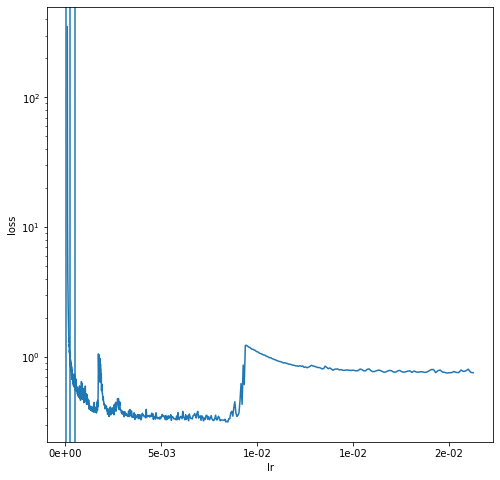

In [218]:
# plot_lr_find(lrf, log=True, xlim=(0, 5e-3))
plot_lr_find(lrf2, log=True)
plt.axvline(args['lr'])
plt.axvline(2.5e-4)
plt.axvline(5e-4)

## Cont

In [110]:
args = load_args(f'../nn_configs/B/91-resnet_cont.yml')

In [111]:
args['train_years'] = ['2012', '2015']

In [112]:
args['lr']

5e-05

In [88]:
dg_train, dg_valid, dg_test = load_data(**args)

DG start 10:35:55.161787
DG normalize 10:35:55.196297
DG load 10:35:58.888618
Loading data into RAM
DG done 10:36:14.617195
DG start 10:36:14.617694
DG normalize 10:36:14.655248
DG load 10:36:14.660069
Loading data into RAM
DG done 10:36:19.094943
DG start 10:36:19.095116
DG normalize 10:36:19.128030
DG load 10:36:19.132689
Loading data into RAM
DG done 10:36:27.216143
Mean = <xarray.DataArray 'z' (level: 38)>
array([ 1.98850334e+05,  1.00647899e+05,  5.37345081e+04,  4.03433032e+04,
        2.86856888e+04,  1.35914929e+04,  6.89669485e+03,  2.13328973e+02,
        2.22363584e+02,  2.51554127e+02,  2.59735673e+02,  2.66296472e+02,
        2.73474321e+02,  2.76108070e+02,  6.45990310e+00,  1.56439640e+01,
        7.96277357e+00,  5.93391784e+00,  4.41566095e+00,  2.33716326e+00,
        1.32865927e+00,  1.36206561e-01,  3.08954923e-01,  7.38044085e-02,
        5.53576819e-02, -1.22827285e-01, -1.07512490e-01, -1.28308157e-01,
        1.36206561e-01,  3.08954923e-01,  7.38044085e-02,  5.

In [113]:
args['loss'] = 'lat_mse'

In [114]:
if args['network_type'] == 'resnet':
    model = build_resnet(
        **args, input_shape=dg_train.shape,
    )
elif args['network_type'] == 'uresnet':
    model = build_uresnet(
        **args, input_shape=dg_train.shape,
    )

In [115]:
if args['loss'] == 'lat_mse':
    loss = create_lat_mse(dg_train.data.lat)
if args['loss'] == 'lat_rmse':
    loss = create_lat_rmse(dg_train.data.lat)
if args['optimizer'] == 'adam':
    opt = keras.optimizers.Adam(args['lr'])
elif args['optimizer'] =='adadelta':
    opt = keras.optimizers.Adadelta(args['lr'])
model.compile(opt, loss, metrics=['mse'])

In [116]:
lrf = LRFinder(
    dg_train.n_samples, args['batch_size'],
    minimum_lr=1e-6, maximum_lr=1e-1,
    lr_scale='exp', save_dir='./', verbose=0)

In [117]:
model.fit(dg_train, epochs=1, callbacks=[lrf])

  ...
    to  
  ['...']
Train for 546 steps
546/546 [==============================] - 101s 185ms/step - loss: 106.2952 - mse: 118.5001


In [118]:
args['loss'] = 'lat_rmse'

In [119]:
if args['network_type'] == 'resnet':
    model = build_resnet(
        **args, input_shape=dg_train.shape,
    )
elif args['network_type'] == 'uresnet':
    model = build_uresnet(
        **args, input_shape=dg_train.shape,
    )

In [120]:
if args['loss'] == 'lat_mse':
    loss = create_lat_mse(dg_train.data.lat)
if args['loss'] == 'lat_rmse':
    loss = create_lat_rmse(dg_train.data.lat)
if args['optimizer'] == 'adam':
    opt = keras.optimizers.Adam(args['lr'])
elif args['optimizer'] =='adadelta':
    opt = keras.optimizers.Adadelta(args['lr'])
model.compile(opt, loss, metrics=['mse'])

In [121]:
lrf2 = LRFinder(
    dg_train.n_samples, args['batch_size'],
    minimum_lr=1e-6, maximum_lr=1e-1,
    lr_scale='exp', save_dir='./', verbose=0)

In [122]:
model.fit(dg_train, epochs=1, callbacks=[lrf2])

  ...
    to  
  ['...']
Train for 546 steps
546/546 [==============================] - 100s 184ms/step - loss: 1.7444 - mse: 12.6005


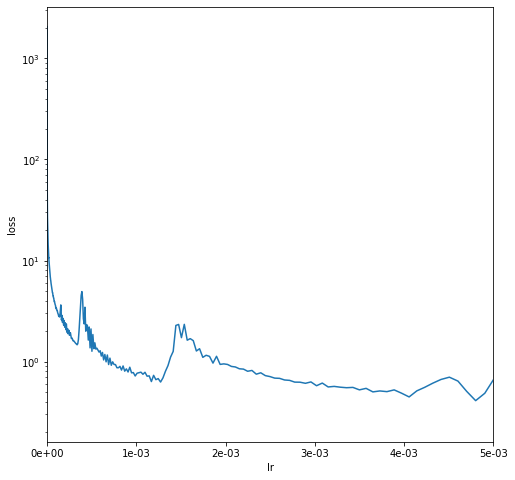

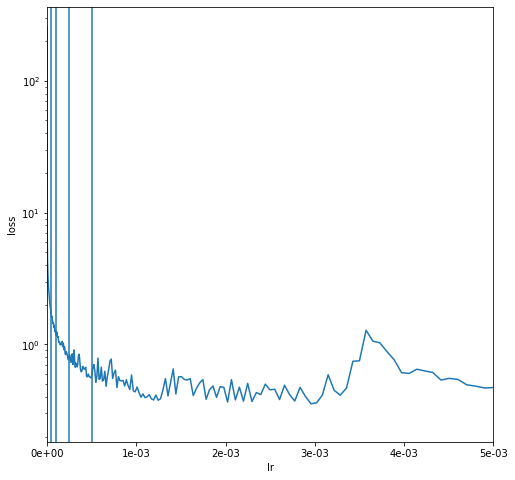

In [130]:
plot_lr_find(lrf, log=True, xlim=(0, 5e-3))
plot_lr_find(lrf2, log=True, xlim=(0, 5e-3))
plt.axvline(args['lr'])
plt.axvline(1e-4)
plt.axvline(2.5e-4)
plt.axvline(5e-4)

## Uresnet

In [131]:
args = load_args(f'../nn_configs/B/94-uresnet2.yml')

In [132]:
args['train_years'] = ['2012', '2015']

In [133]:
args['lr']

5e-05

In [134]:
dg_train, dg_valid, dg_test = load_data(**args)

DG start 10:45:59.813864
DG normalize 10:45:59.853385
DG load 10:46:03.654669
Loading data into RAM
DG done 10:46:19.795516
DG start 10:46:19.795800
DG normalize 10:46:19.834163
DG load 10:46:19.839253
Loading data into RAM
DG done 10:46:24.554171
DG start 10:46:24.554627
DG normalize 10:46:24.594325
DG load 10:46:24.600322
Loading data into RAM
DG done 10:46:33.391179
Mean = <xarray.DataArray 'z' (level: 38)>
array([ 1.98850334e+05,  1.00647899e+05,  5.37345081e+04,  4.03433032e+04,
        2.86856888e+04,  1.35914929e+04,  6.89669485e+03,  2.13328973e+02,
        2.22363584e+02,  2.51554127e+02,  2.59735673e+02,  2.66296472e+02,
        2.73474321e+02,  2.76108070e+02,  6.45990310e+00,  1.56439640e+01,
        7.96277357e+00,  5.93391784e+00,  4.41566095e+00,  2.33716326e+00,
        1.32865927e+00,  1.36206561e-01,  3.08954923e-01,  7.38044085e-02,
        5.53576819e-02, -1.22827285e-01, -1.07512490e-01, -1.28308157e-01,
        1.36206561e-01,  3.08954923e-01,  7.38044085e-02,  5.

In [135]:
args['loss'] = 'lat_mse'

In [137]:
if args['network_type'] == 'resnet':
    model = build_resnet(
        **args, input_shape=dg_train.shape,
    )
elif args['network_type'] == 'uresnet':
    model = build_uresnet(
        **args, input_shape=dg_train.shape,
    )

In [138]:
if args['loss'] == 'lat_mse':
    loss = create_lat_mse(dg_train.data.lat)
if args['loss'] == 'lat_rmse':
    loss = create_lat_rmse(dg_train.data.lat)
if args['optimizer'] == 'adam':
    opt = keras.optimizers.Adam(args['lr'])
elif args['optimizer'] =='adadelta':
    opt = keras.optimizers.Adadelta(args['lr'])
model.compile(opt, loss, metrics=['mse'])

In [139]:
lrf = LRFinder(
    dg_train.n_samples, args['batch_size'],
    minimum_lr=1e-6, maximum_lr=1e-1,
    lr_scale='exp', save_dir='./', verbose=0)

In [140]:
model.fit(dg_train, epochs=1, callbacks=[lrf])

  ...
    to  
  ['...']
Train for 547 steps
547/547 [==============================] - 112s 206ms/step - loss: 637382.1197 - mse: 500897.9062


In [141]:
args['loss'] = 'lat_rmse'

In [142]:
if args['network_type'] == 'resnet':
    model = build_resnet(
        **args, input_shape=dg_train.shape,
    )
elif args['network_type'] == 'uresnet':
    model = build_uresnet(
        **args, input_shape=dg_train.shape,
    )

In [143]:
if args['loss'] == 'lat_mse':
    loss = create_lat_mse(dg_train.data.lat)
if args['loss'] == 'lat_rmse':
    loss = create_lat_rmse(dg_train.data.lat)
if args['optimizer'] == 'adam':
    opt = keras.optimizers.Adam(args['lr'])
elif args['optimizer'] =='adadelta':
    opt = keras.optimizers.Adadelta(args['lr'])
model.compile(opt, loss, metrics=['mse'])

In [144]:
lrf2 = LRFinder(
    dg_train.n_samples, args['batch_size'],
    minimum_lr=1e-6, maximum_lr=1e-1,
    lr_scale='exp', save_dir='./', verbose=0)

In [145]:
model.fit(dg_train, epochs=1, callbacks=[lrf2])

  ...
    to  
  ['...']
Train for 547 steps
547/547 [==============================] - 110s 201ms/step - loss: nan - mse: nan


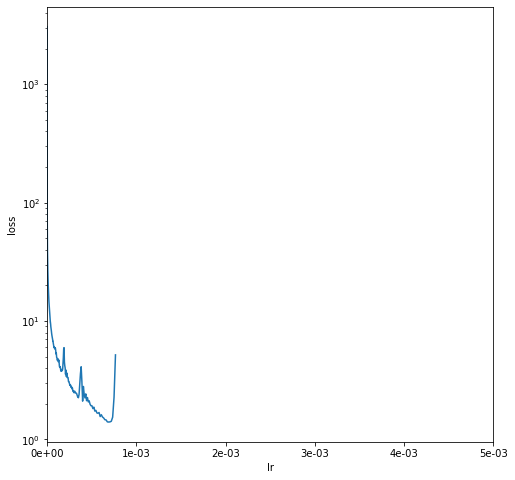

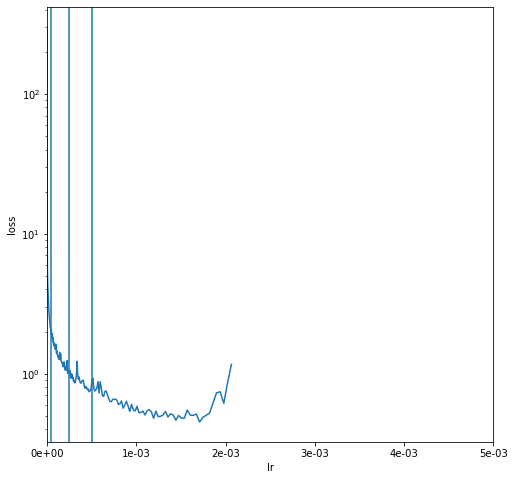

In [146]:
plot_lr_find(lrf, log=True, xlim=(0, 5e-3))
plot_lr_find(lrf2, log=True, xlim=(0, 5e-3))
plt.axvline(args['lr'])
plt.axvline(2.5e-4)
plt.axvline(5e-4)

## Batch size

In [162]:
args = load_args(f'../nn_configs/B/71-resnet_d3_best_5d.yml')

In [178]:
args['train_years'] = ['2009', '2015']

In [179]:
args['lr']

5e-05

In [180]:
dg_train, dg_valid, dg_test = load_data(**args)

DG start 11:16:48.585253
DG normalize 11:16:48.624971
DG load 11:16:59.213772
Loading data into RAM
DG done 11:25:33.931058
DG start 11:25:33.931652
DG normalize 11:25:33.981327
DG load 11:25:33.990172
Loading data into RAM
DG done 11:25:43.864193
DG start 11:25:43.864447
DG normalize 11:25:43.899051
DG load 11:25:43.903993
Loading data into RAM
DG done 11:26:32.505014
Mean = <xarray.DataArray 'z' (level: 38)>
array([ 1.98563018e+05,  1.00862017e+05,  5.39005666e+04,  4.04794142e+04,
        2.88004891e+04,  1.36804299e+04,  6.97225127e+03,  2.11968039e+02,
        2.21935342e+02,  2.52136976e+02,  2.60228186e+02,  2.66619135e+02,
        2.73762989e+02,  2.76530903e+02,  8.83048653e+00,  1.43643226e+01,
        7.18708628e+00,  5.32244119e+00,  3.63854516e+00,  1.51709643e+00,
        7.71447725e-01, -1.99429539e-01,  1.62770717e-01,  1.55475059e-02,
       -8.87346349e-02, -6.18164722e-02,  7.62959584e-02, -7.40862973e-03,
       -1.99429539e-01,  1.62770717e-01,  1.55475059e-02, -8.

In [181]:
if args['network_type'] == 'resnet':
    model = build_resnet(
        **args, input_shape=dg_train.shape,
    )
elif args['network_type'] == 'uresnet':
    model = build_uresnet(
        **args, input_shape=dg_train.shape,
    )

In [182]:
args['batch_size']

32

In [183]:
if args['loss'] == 'lat_mse':
    loss = create_lat_mse(dg_train.data.lat)
if args['loss'] == 'lat_rmse':
    loss = create_lat_rmse(dg_train.data.lat)
if args['optimizer'] == 'adam':
    opt = keras.optimizers.Adam(args['lr'])
elif args['optimizer'] =='adadelta':
    opt = keras.optimizers.Adadelta(args['lr'])
model.compile(opt, loss, metrics=['mse'])

In [184]:
dg_train.n_samples

61224

In [185]:
lrf = LRFinder(
    dg_train.n_samples, args['batch_size'],
    minimum_lr=1e-5, maximum_lr=1e-1,
    lr_scale='exp', save_dir='./', verbose=0)

In [186]:
model.fit(dg_train, epochs=1, callbacks=[lrf])

  ...
    to  
  ['...']
Train for 1914 steps
1914/1914 [==============================] - 337s 176ms/step - loss: 2.5648 - mse: 3.6517


In [187]:
dg_train.batch_size = 64

In [188]:
if args['network_type'] == 'resnet':
    model = build_resnet(
        **args, input_shape=dg_train.shape,
    )
elif args['network_type'] == 'uresnet':
    model = build_uresnet(
        **args, input_shape=dg_train.shape,
    )

In [189]:
if args['loss'] == 'lat_mse':
    loss = create_lat_mse(dg_train.data.lat)
if args['loss'] == 'lat_rmse':
    loss = create_lat_rmse(dg_train.data.lat)
if args['optimizer'] == 'adam':
    opt = keras.optimizers.Adam(args['lr'])
elif args['optimizer'] =='adadelta':
    opt = keras.optimizers.Adadelta(args['lr'])
model.compile(opt, loss, metrics=['mse'])

In [190]:
lrf2 = LRFinder(
    dg_train.n_samples, args['batch_size'],
    minimum_lr=1e-5, maximum_lr=1e-1,
    lr_scale='exp', save_dir='./', verbose=0)

In [191]:
model.fit(dg_train, epochs=1, callbacks=[lrf2])

  ...
    to  
  ['...']
Train for 957 steps
957/957 [==============================] - 306s 320ms/step - loss: 3.1562 - mse: 4.4805


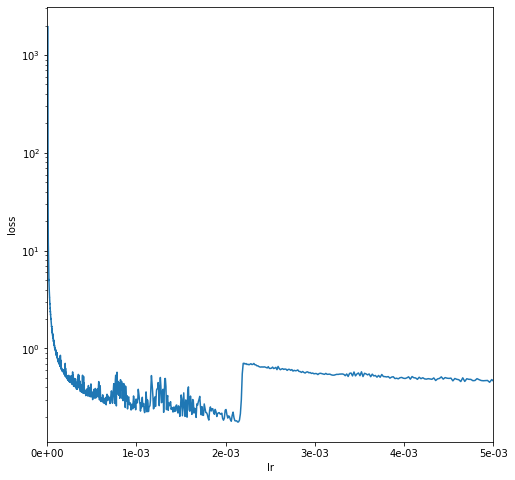

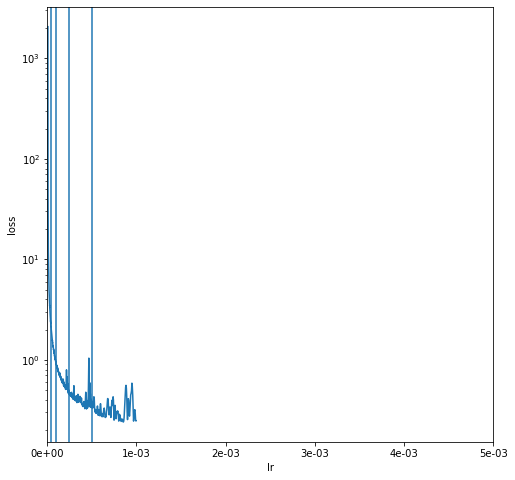

In [192]:
plot_lr_find(lrf, log=True, xlim=(0, 5e-3))
plot_lr_find(lrf2, log=True, xlim=(0, 5e-3))
plt.axvline(args['lr'])
plt.axvline(1e-4)
plt.axvline(2.5e-4)
plt.axvline(5e-4)